# Practica III 
## Analisis de Top N
### PIE

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('../data/viajes_surfistas.csv')
df

,homename,homecontinent,homecountry,homelat,homelon,travelcontinent,travelcountry,travellat,travellon
0,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
1,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.022100,-118.481000
2,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.030400,-118.779000
3,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
4,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.888889,-118.405278
...,...,...,...,...,...,...,...,...,...
9506,"Bridgetown, Western Australia",Australia,Australia,-33.954448,116.131214,Australia,Australia,-34.225000,115.017000
9507,"Lille, France",Europe,France,50.629250,3.057256,Europe,France,45.002343,-1.201475
9508,MX,South America,Mexico,23.634501,-102.552784,South America,Mexico,21.016700,-101.250000
9509,Kuta - Bali - Indonesia,Asia,Indonesia,-8.739184,115.171130,Asia,Indonesia,-8.710093,115.166845


In [3]:
df["homecountry"].unique() # nos da los vlaores unicos

array(['United States of America', 'France', 'Indonesia', 'Spain',
       'United Kingdom', 'Philippines', 'Australia', 'Germany', 'Brazil',
       'Ireland', 'Japan', 'Colombia', 'Morocco', 'Chile', 'Kuwait',
       'Uruguay', 'Italy', 'South Korea', 'Venezuela', 'India', 'Peru',
       'New Zealand', 'Mexico', 'Oman', 'Netherlands', 'Bangladesh',
       'Kenya', 'Thailand', 'Switzerland', 'Argentina', 'Lebanon',
       'Malaysia', 'Poland', 'Dominican Republic', 'Portugal', 'Jordan',
       'Canada', 'Singapore', 'Costa Rica', 'United Arab Emirates',
       'Uzbekistan', 'Qatar', 'Panama', 'Saint Barthelemy',
       'South Africa', 'Ukraine', 'Greece', 'Norway', 'Turkey',
       'French Polynesia', 'Slovenia', 'Guatemala', 'Taiwan', 'Nicaragua',
       'Ecuador', 'Hong Kong S.A.R.', 'El Salvador', 'Paraguay', 'Russia',
       'Namibia', 'Puerto Rico', 'Belgium', 'Nigeria', 'Jersey', 'Cuba',
       'China', 'Uganda', 'Belarus', 'Sri Lanka', 'Romania', 'Slovakia',
       'Sweden', 'Lux

In [4]:
len(df["homecountry"].unique())

101

In [5]:
agrupado = df.groupby('homecountry').agg({
    'homename':'count' # utilizamos otro nombre
})

agrupado


,homename
homecountry,
Andorra,1
Argentina,143
Australia,809
Austria,3
Bahrain,2
...,...
United States Virgin Islands,2
United States of America,2826
Uruguay,21


In [6]:
agrupado_ordenado = agrupado.sort_values('homename', ascending=False) # ordenamos
agrupado_ordenado

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752
United Kingdom,496
...,...
Nepal,1
Oman,1
Pakistan,1


In [7]:
top_4 = agrupado_ordenado.head(4) # extraemos el top 4
top_4

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752


In [8]:
df_otros = agrupado_ordenado.drop(index=top_4.index.values) # removemos el top 4
df_otros

,homename
homecountry,
United Kingdom,496
France,433
Brazil,379
Portugal,367
Italy,295
...,...
Nepal,1
Oman,1
Pakistan,1


In [9]:
df_otros['pais'] = 'Otros' # agregamos una nueva columna como tip para hacer el groupby
df_otros

,homename,pais
homecountry,,
United Kingdom,496,Otros
France,433,Otros
Brazil,379,Otros
Portugal,367,Otros
Italy,295,Otros
...,...,...
Nepal,1,Otros
Oman,1,Otros
Pakistan,1,Otros


In [10]:
df_otros_agrupado = df_otros.groupby('pais').agg({
    'homename':'sum' # obtenemos la suma de todos los registros
})
df_otros_agrupado

,homename
pais,
Otros,4231


In [11]:
df_otros_agrupado = df_otros_agrupado.reset_index()
df_otros_agrupado

,pais,homename
0,Otros,4231


In [12]:
top_4 = top_4.reset_index()
top_4

,homecountry,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [13]:
top_4.columns = ['pais','homename'] # sobreescribimos los nombres de las columnas
top_4

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [14]:
df_final = pd.concat([top_4,df_otros_agrupado]) # concatenamos filas
df_final

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752
0,Otros,4231


In [15]:
df_final = df_final.set_index('pais')
df_final

,homename
pais,
United States of America,2826
Japan,893
Australia,809
Spain,752
Otros,4231


Text(0.5, 1.0, 'Porcentaje de surfistas por pais de procedencia')

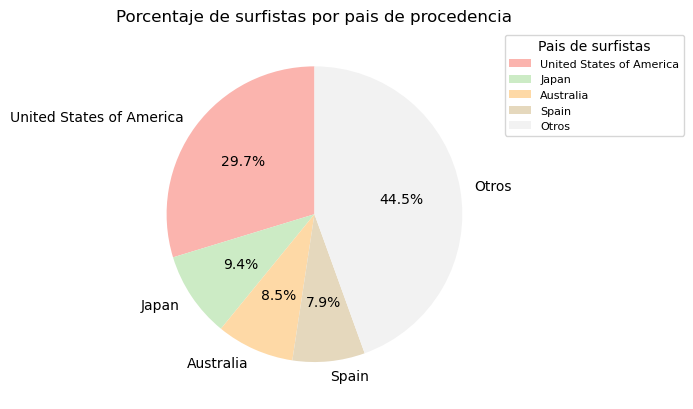

In [25]:
ax = df_final.plot.pie(
    y='homename', 
    startangle=90,
    autopct='%1.1f%%',
    colormap='Pastel1' # Colores Pasteles
)

ax.set_ylabel('')

ax.legend(
    title='Pais de surfistas',
    fontsize=8,
    bbox_to_anchor=(1,1)
)

ax.set_title("Porcentaje de surfistas por pais de procedencia")